# Análise sobre o Tempo de Entrega

A base de dados utilizada está presente em ```data/data.xlsx```

A sua descrição está presente em ```data/description.txt```

Autores:
* David Joshua;
* Gabriel Cavalcanti Araújo;
* Gabriel Emannuel Gama Andrade.

## 1. Preparando o ambiente

### 1.1 Baixando os pacotes Necessários 

Abaixo estará o download de todos os pacotes úteis para a realização da análise

In [124]:
install.packages("pacman")

library(pacman)

pacman :: p_load(
    rio, # Importação fácil dos arquivos XLSX
    dplyr, # Permitir diversas formas de manipulação de dados
    skimr, # Utilização de outras formas de sumarizar os dados (Além da função built-in do R)
    psych, # Mesmo motivo do uso da skimr, melhorando a análise da base de dados
    )

Installing package into ‘/home/ferte/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)


Your package installed

Warning message in pacman::p_load(rio, dplyr, skimr, psych, ):
“Failed to install/load:
”


### 1.2 Carregando a base de dados em memória

Abaixo estará o carregamento da base de dados para a memória

In [125]:
DIRETORIO_DATA_SET <- "data/data.xlsx"

data <- import(DIRETORIO_DATA_SET)

data_numeric <- data %>% select_if(is.numeric)

data_character <- data %>% select_if(is.character)

### 1.3 Criando constantes para as Legendas

Em virtude que os gráficos irão possuir legendas comuns, em virtude das colunas que serão usadas para a geração do gráfico, esta seção irá determinar as constantes que serão usadas.

In [126]:
LEGENDA_TEMPO <- "Tempo da Entrega"
LEGENDA_DISTANCA <- "Distância da Entrega"
LEGENDA_VOLUME <- "Volume de pacotes"
LEGENDA_CAPACIDADE <- "Capacidade da Frota"
LEGENDA_INVESTIMENTO <- "Investimendo de Logística"
LEGENDA_TRAFEGO <- "Tráfego"
LEGENDA_NUMERO <- "Número de paradas"
LEGENDA_TECNOLOGIA <- "Presença de Tecnologia de Rastreamento"
LEGENDA_INFRAESTRUTRA <- "Qualidade da Infraestrutura da Rodovia"

## 2. Introdução

Iremos sumarizar o conjunto de dados, utilizando as funções à nossa disposição, com o fim de entender a base de dados e possíveis relacionamentos

### 2.1 Utilizando as funções built-in do R

A função summary é simples, mas resume as características dos dados eficientemente e é uma boa primeira vista de qualquer base de dados.

---

Informações importantes que a função traz para cada coluna numérica:
* Intervalos de valores (Valor mínimo e Máximo);
    * Também é apresentado o "comportamento" de crescimento, com os quantis e a mediana.
* Média;
* Valores ausentes.

In [127]:
summary(data)

 Distancia_entrega Volume_pacotes   Capacidade_frota Investimento_logistica
 Min.   :  8.926   Min.   : 50.56   Min.   : 68.53   Min.   : 5.447        
 1st Qu.: 41.454   1st Qu.: 75.65   1st Qu.: 81.85   1st Qu.:27.143        
 Median : 53.427   Median : 80.68   Median : 86.67   Median :34.112        
 Mean   : 52.836   Mean   : 80.98   Mean   : 86.54   Mean   :34.749        
 3rd Qu.: 63.448   3rd Qu.: 86.38   3rd Qu.: 91.00   3rd Qu.:42.474        
 Max.   :112.060   Max.   :106.66   Max.   :107.88   Max.   :62.487        
 NA's   :21        NA's   :21       NA's   :21       NA's   :21            
 Infraestrutura_rodoviaria    Trafego       Tecnologia_rastreamento
 Length:700                Min.   :-25.38   Length:700             
 Class :character          1st Qu.: 12.51   Class :character       
 Mode  :character          Median : 23.74   Mode  :character       
                           Mean   : 22.89                          
                           3rd Qu.: 33.21           

Em relação ao tipo das colunas:

<center>
  <table>
    <tr>
      <th>Tipo</th>
      <th>Quantidade</th>
    </tr>
    <tr>
      <th>Numérico</th>
      <th>7¹</th>
    </tr>
    <tr>
      <th>Textual (Categórico)²</th>
      <th>2</th>
    </tr>
  </table>
</center>

Observações:

* ¹ A coluna da variável dependente está sendo contada!
* ² Os valores categóricos serão melhores explorados em seções posteriores.

Dentre os valores numéricos, iremos utilizar a descrição textual da base de dados na tentativa de inferir o impacto de cada uma das colunas na variável dependente (O tempo de entrega):

<center>
  <table>
    <tr>
      <th>Coluna</th>
      <th>Proporcionalidade</th>
      <th>Motivo</th>
    </tr>
    <tr>
      <th>Distância</th>
      <th>Diretamente</th>
      <th>Quanto maior a distância, a viagem será mais longa.</th>
    </tr>
    <tr>
      <th>Volume</th>
      <th>Diretamente</th>
      <th>Quanto mais carga, será necessário mais cuidado na direção, causando mais lentidão na viagem.</th>
    </tr>
    <tr>
      <th>Capacidade</th>
      <th>Diretamente</th>
      <th>Quanto mais carga é possível ser levada, maior será o veículo, sendo necessário mais controle na direção.</th>
    </tr>
    <tr>
      <th>Investimento</th>
      <th>Inversamente</th>
      <th>Quanto mais planejado o transporte da carga, melhor será a escolha das rotas, dessa forma será mais rápido.</th>
    </tr>
    <tr>
      <th>Tráfego</th>
      <th>Diretamente</th>
      <th>Maior o trãnsito, mais lenta será a viagem.</th>
    </tr>
    <tr>
      <th>Número de paradas</th>
      <th>Diretamente</th>
      <th>Quanto mais paradas, mais lento.</th>
    </tr>
  </table>
</center>

Vamos testar com a função built-in do R que calcula a correlação linear!

In [128]:
correlacao_linear_de_pearson <- as.data.frame(
    cor(data_numeric,
        method = "pearson",
        use = "complete.obs"))

correlacao_tempo <- correlacao_linear_de_pearson[7]

correlacao_tempo

,Tempo_entrega
,<dbl>
Distancia_entrega,0.45790367
Volume_pacotes,-0.46462788
Capacidade_frota,0.08503601
Investimento_logistica,0.18255353
Trafego,0.70992634
Numero_paradas,0.45824699
Tempo_entrega,1.00000000


Não vamos nos assustar com esses resultados! Vale lembrar que a correlação linear é calculada considerando apenas a relação das duas variáveis no conjunto de dados, não considerando o relacionamento das mesmas com o resto do conjunto. Um exemplo é que não estamos considerando apenas a distância com o tempo, visto que nos casos que ocorreram altas distâncias, o tráfego poderia ter sido irrisório, vice-versa também podendo ocorrer.

O que esses dados mostram, de fato, é que não podemos considerar muitas dessas colunas isoladamente, possívelmente tendo melhores resultados utilizando uma regressão múltipla (mas não vamos nos apressar ainda, iremos analisar melhor o conjunto para ter uma maior profundidade).
* O motivo disto, é que informações que obviamente deveriam ser importantes, não estão sendo (pelo menos, não linearmente). Deste modo, temos certeza que ao menos valerá a pena um estudo de regressão em conjunto.

---

Abaixo iremos identificar os gráficos de dispersão das colunas numéricas em relação ao tempo de entrega, o objetivo é identificar as relações de correlação de forma visual, sem utilizar as fórmulas numéricas conhecidas. A fim de realizar isto, iremos utilizar a função de plotagem built-in do R.



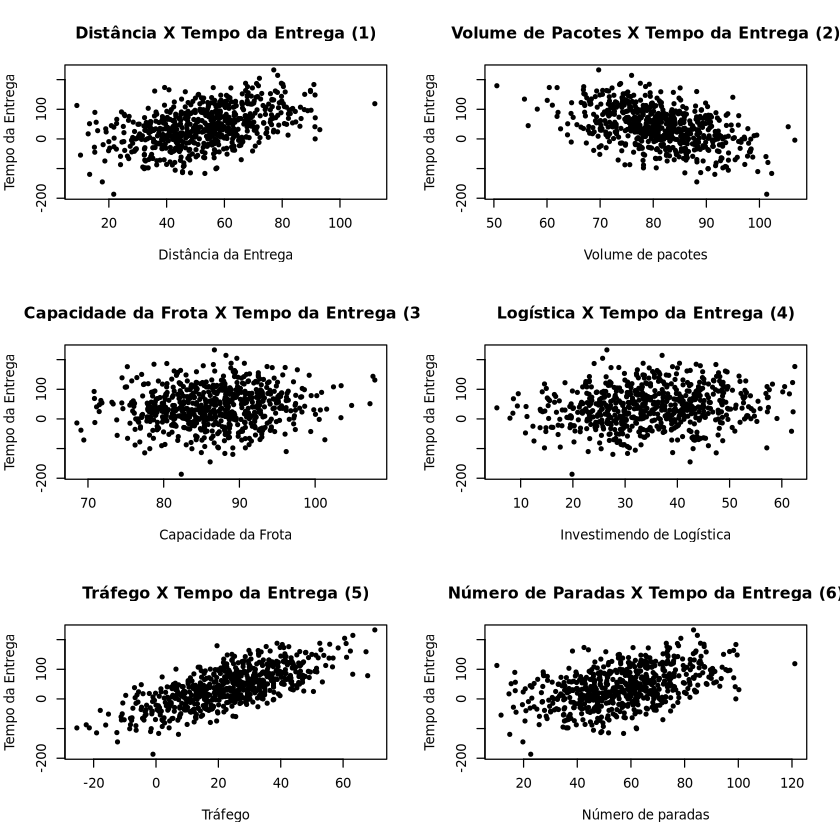

In [129]:
par(mfrow=c(3,2))

plot(x = data_numeric$Distancia_entrega,
     y = data_numeric$Tempo_entrega,
     pch=20,
     xlab=LEGENDA_DISTANCA,
     ylab=LEGENDA_TEMPO,
     main = "Distância X Tempo da Entrega (1)"
     )

plot(x = data_numeric$Volume_pacotes,
     y = data_numeric$Tempo_entrega,
     pch=20,
     xlab=LEGENDA_VOLUME,
     ylab=LEGENDA_TEMPO,
     main = "Volume de Pacotes X Tempo da Entrega (2)")

plot(x = data_numeric$Capacidade_frota,
     y = data_numeric$Tempo_entrega,
     pch=20,
     xlab=LEGENDA_CAPACIDADE,
     ylab=LEGENDA_TEMPO,
     main = "Capacidade da Frota X Tempo da Entrega (3)")

plot(x = data_numeric$Investimento_logistica,
     y = data_numeric$Tempo_entrega,
     pch=20,
     xlab=LEGENDA_INVESTIMENTO,
     ylab=LEGENDA_TEMPO,
     main = "Logística X Tempo da Entrega (4)")

plot(x = data_numeric$Trafego,
     y = data_numeric$Tempo_entrega,
     pch=20,
     xlab=LEGENDA_TRAFEGO,
     ylab=LEGENDA_TEMPO,
     main="Tráfego X Tempo da Entrega (5)")

plot(x = data_numeric$Numero_paradas,
     y = data_numeric$Tempo_entrega,
     pch=20,
     xlab=LEGENDA_NUMERO,
     ylab=LEGENDA_TEMPO,
     main="Número de Paradas X Tempo da Entrega (6)")

Foi identificada uma relação crescente nos gráficos 1, 5 e 6, embora apenas no gráfico 5 a correlação linear é mais aparente;

No gráfico 2 foi identificada uma relação decrescente, embora não tão aparente como no gráfico 5;

No gráficos 3 e 4, a correlação linear é indeferente, visto que não ocorre um comportamento crescente e nem decrescente.

### 2.2 Utilizando pacotes associados

Vamos aprofundar as análises utilizando funções de pacotes associados.

In [130]:
analise_detalhada_base_dados <- as.data.frame(skim(data))

analise_detalhada_base_dados_numericas <- analise_detalhada_base_dados[3:9, c(2, 10:17)]

analise_detalhada_base_dados_caracteres <- analise_detalhada_base_dados[1:2,2:9]

Antes de começarmos a tocar nos dados categóricos, vamos dar uma última olhada de forma detalhada nos dados numéricos:

In [131]:
analise_detalhada_base_dados_numericas

,skim_variable,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,numeric.hist
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
3,Distancia_entrega,52.83643,16.468278,8.926286,41.4541880,53.42742,63.44788,112.06009,▂▇▇▂▁
4,Volume_pacotes,80.97612,8.245766,50.558933,75.6515374,80.68076,86.37844,106.65914,▁▂▇▅▁
5,Capacidade_frota,86.54448,6.471528,68.533403,81.8510943,86.67003,91.00019,107.88115,▁▆▇▃▁
6,Investimento_logistica,34.74923,10.665125,5.447083,27.1429689,34.11154,42.47379,62.48719,▁▅▇▆▂
7,Trafego,22.89164,15.965663,-25.380705,12.5140263,23.73891,33.21344,70.17059,▁▃▇▅▁
8,Numero_paradas,57.24183,17.756303,10.042547,45.3061734,57.92035,68.63091,121.05497,▂▇▇▂▁
9,Tempo_entrega,39.62845,63.629915,-186.619496,-0.9845775,37.39415,83.18893,232.80856,▁▃▇▅▁


A partir das informações acima, podemos inferir:
* O quanto os dados variam, isto pode ser verificada a partir de seu desvio padrão.
  * O tempo é o dado que mais varia, com um desvio padrão de 63,63 unidades;
  * A capacidade da frota e o volume carregado possuem as menores variações, com taxas de desvio padrão menores de 10 unidades.

* Onde está concentrada a maior parte de seus valores, isto é verificado nos histogramas no final da tabela:
  * A maior parte dos dados possui uma distribuição mais próxima do normal, sendo mais distribuida ao redor de sua média/mediana;
  * A distância de entrega e o número de paradas está mais concentrada à esquerda de sua mediana/média;

In [132]:
analise_detalhada_base_dados_caracteres

,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,Infraestrutura_rodoviaria,21,0.97,3,5,0,3,0
2,Tecnologia_rastreamento,21,0.97,3,3,0,2,0


São apenas duas colunas de valores categóricos, cada uma não contendo mais de 5 valores únicos.

Em uma análise mais profunda, para a infraestrutura da rodoviária, temos apenas três valores categóricos para representar a informação; Para a tecnologia de rastreamento, temos dois.

Vamos identificar os valores únicos de cada dessas colunas:

In [133]:
unique(data_character$Infraestrutura_rodoviaria)
unique(data_character$Tecnologia_rastreamento)

[1] "Medio" "Ruim"  "Bom"   NA

[1] "Sim" "Nao" NA

Uma coisa interessante a se identificar, é que os valores de infraestrutura são qualitativos ordinais, ou seja, existe uma relação de valor entre eles. A interpretação da qualidade de infraestrutura é que o "Ruim" seria o pior, o "Médio" o valor intermediário e o "Bom" o melhor valor;

Outra informação interessante, é que a tecnologia de rastreamento possui um valor de presença ou ausência, ou seja, o valor "Sim" significa que a tecnologia de rastreamento está sendo utilizada, e o valor "Não" significa que não existe uso na tecnologia de rastreamento.

---

Abaixo iremos identificar visualmente a relação entre os valores categóricos e a variável dependente:

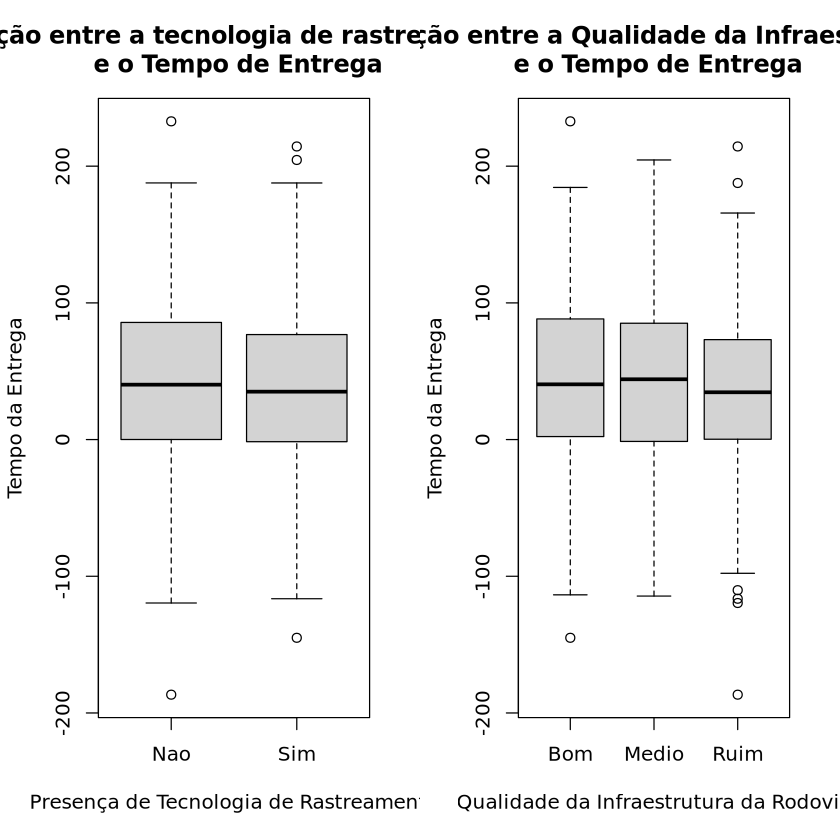

In [ ]:
par(mfrow=c(1,2))

boxplot(
    Tempo_entrega ~ Tecnologia_rastreamento, 
    data = data,
    main="Relação entre a tecnologia de rastreamento \n e o Tempo de Entrega",
    ylab=LEGENDA_TEMPO,
    xlab=LEGENDA_TECNOLOGIA
    )

boxplot(
    Tempo_entrega ~ Infraestrutura_rodoviaria, 
    data = data,
    main="Relação entre a Qualidade da Infraestrutura \n e o Tempo de Entrega",
    ylab=LEGENDA_TEMPO,
    xlab=LEGENDA_INFRAESTRUTRA
    )

# Precisamos ver como isto é visto no RStudio

É perceptível que caso não seja utilizado 